In [1]:
import cobra

In [2]:
import pandas, seaborn, numpy

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(8, 4)})

# 0. user defined variables

In [4]:
expression_input_file = '/Users/adrian/projects/riia/data/expression/optimal_dataset.csv'
model_file = '/Users/adrian/projects/riia/data/model/Recon3DModel_301.mat'
flux_change_results_file = '/Users/adrian/projects/riia/results/flux_change_results_file.csv'

# 1. read expression data

In [5]:
df = pandas.read_csv(expression_input_file, index_col='Feature')
expression = df.drop('Unnamed: 0', axis=1)
expression.shape

(4998, 2636)

In [6]:
expression = pandas.read_csv(expression_input_file)
expression.drop(["Unnamed: 0"], axis='columns', inplace=True)
expression = expression.set_index("Feature")
expression.rename_axis(None, inplace=True)

print(expression.shape)
expression.head()

(4998, 2636)


,GSM752709.cel,GSM752710.cel,GSM752711.cel,GSM752712.cel,GSM752713.cel,GSM752714.cel,GSM752715.cel,GSM752716.cel,GSM752717.cel,GSM752718.cel,...,GSM46386.CEL,GSM46387.CEL,GSM46388.CEL,GSM46389.CEL,GSM46390.CEL,GSM46391.CEL,GSM46392.CEL,GSM46393.CEL,GSM46394.CEL,GSM46395.CEL
100,6.082276,6.296477,5.678143,5.903716,6.561618,6.563634,6.315923,6.285618,6.213070,6.462815,...,6.277586,6.319818,6.377999,6.527582,6.489835,6.624150,8.837815,8.586964,6.352242,6.281925
1000,8.910453,9.094440,9.018398,8.981716,9.903595,9.752144,10.060706,10.016482,10.449370,10.395254,...,8.676218,8.441180,8.843971,8.998472,8.892125,8.860669,9.992499,10.019584,8.024033,7.984392
10000,3.903745,3.573659,3.750108,4.090731,3.960562,3.867853,3.701989,3.649789,3.906663,3.963748,...,6.441616,6.292823,6.226290,6.620311,6.222595,6.497028,7.098504,7.330978,6.436398,6.473776
10005,5.963907,6.097107,5.790247,5.761399,6.016096,6.124152,6.104648,5.986309,5.860771,6.024226,...,7.281914,7.315629,7.086792,7.135733,7.045656,6.585559,7.457399,8.094391,6.995187,7.402195
10006,7.752008,7.465366,7.941747,7.606796,7.469340,7.268851,7.641408,7.385734,7.565066,7.325005,...,6.486721,6.146278,5.913813,5.738923,6.470929,6.267256,6.340759,7.332293,5.348349,5.980073


In [7]:
transpose_expression = expression.transpose()
transpose_expression.head()

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
GSM752709.cel,6.082276,8.910453,3.903745,5.963907,7.752008,7.375102,5.187760,5.620045,10.513556,9.541779,...,9.972469,11.040979,7.934275,10.396367,7.174313,9.607231,4.541300,5.560324,5.421064,6.115885
GSM752710.cel,6.296477,9.094440,3.573659,6.097107,7.465366,7.314584,4.776528,5.593111,10.304974,9.013600,...,9.869174,11.418171,8.313562,10.662624,6.760496,9.543961,4.129266,5.308262,5.107210,5.385675
GSM752711.cel,5.678143,9.018398,3.750108,5.790247,7.941747,7.420180,5.657152,5.238865,10.533208,9.677985,...,9.908754,11.222550,7.915767,10.335600,7.501811,9.677517,4.073877,5.546625,5.445133,5.948111
GSM752712.cel,5.903716,8.981716,4.090731,5.761399,7.606796,7.501158,5.115412,5.331495,10.522132,9.546220,...,9.884071,11.050198,7.927955,10.168285,7.240025,9.559407,4.563461,5.734750,5.229923,5.777848
GSM752713.cel,6.561618,9.903595,3.960562,6.016096,7.469340,7.443952,5.041231,5.256271,10.415659,9.294982,...,9.883845,9.632507,8.109991,10.208548,6.728994,9.398856,3.990184,5.004711,5.538198,5.569191


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


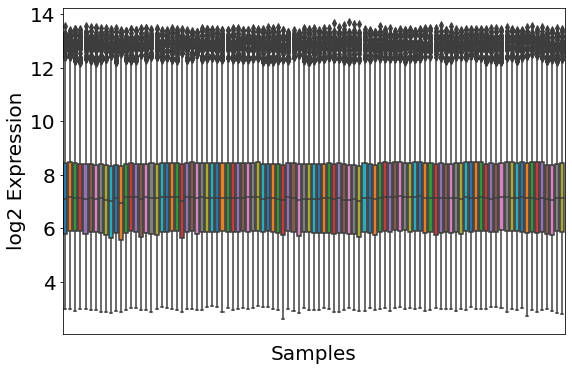

In [8]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 1:100], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

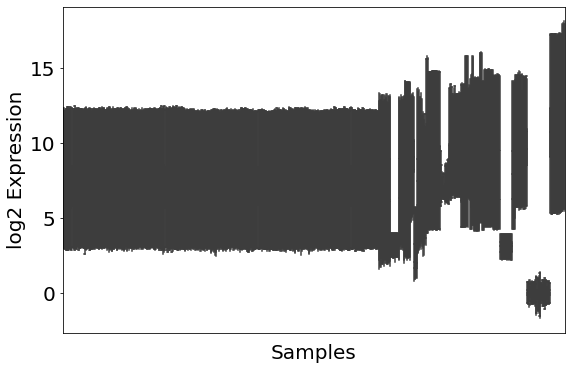

In [9]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 1:1000], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

# 2. quantile normalization

In [10]:
def quantile_normalization(df):
    
    "Quantile normalization consists on sorting, averaging and re-ordering."
    "For more information: https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/"
  
    # step 1/3: sorting sample values
    df_sorted = pandas.DataFrame(numpy.sort(df.values, axis=0), index=df.index, columns=df.columns)
    # step 2/3: averaging rank values across samples
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = numpy.arange(1, len(df_mean) + 1)
    # step 3/3: re-ordering samples
    df.rank(method="min").astype(int)
    df_qn = df.rank(method="min").stack().astype(int).map(df_mean).unstack()

    return df_qn

In [11]:
%%time
expression_qn = quantile_normalization(expression)

CPU times: user 4.19 s, sys: 951 ms, total: 5.14 s
Wall time: 5.55 s


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


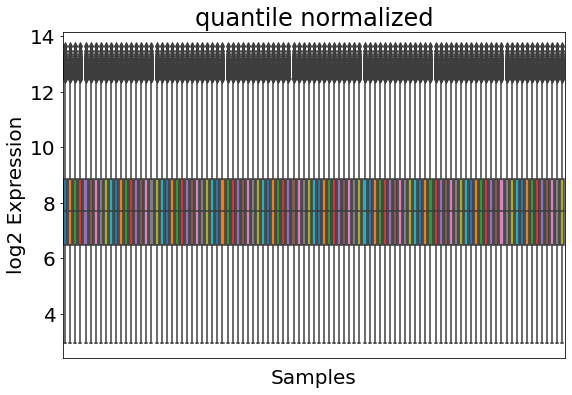

In [12]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 1:100], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression', title='quantile normalized')
matplotlib.pyplot.show()

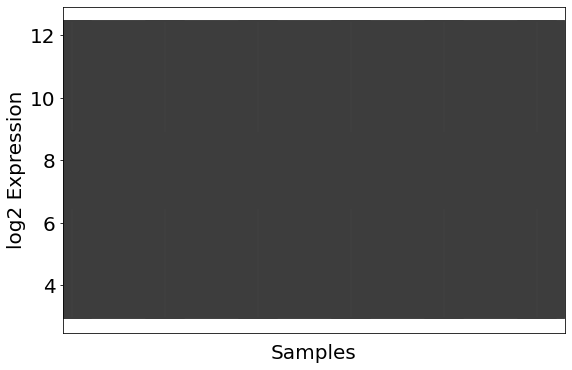

In [13]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 1:1000], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

In [14]:
transpose_expression_qn = expression_qn.transpose()
transpose_expression_qn.head()

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
GSM752709.cel,6.674178,9.253471,4.348688,6.547967,8.226402,7.877847,5.749067,6.206224,10.636120,9.778866,...,10.163430,11.088139,8.392577,10.538061,7.682210,9.836996,5.061649,6.168413,6.018051,6.700115
GSM752710.cel,6.962708,9.450826,4.065701,6.769329,8.032836,7.895058,5.468747,6.288019,10.499423,9.397884,...,10.099152,11.525933,8.771970,10.807247,7.391308,9.823300,4.774275,5.997441,5.814616,6.052927
GSM752711.cel,6.274973,9.358252,4.198858,6.382631,8.411676,7.915058,6.250226,5.814616,10.653945,9.897394,...,10.110796,11.266447,8.381983,10.480788,7.975027,9.895337,4.552457,6.131025,6.048658,6.539920
GSM752712.cel,6.483298,9.347803,4.587900,6.334080,8.095503,8.000321,5.698585,5.916943,10.664650,9.821316,...,10.108416,11.124328,8.410712,10.373180,7.771491,9.835031,5.103788,6.311302,5.820957,6.340377
GSM752713.cel,7.144404,10.134623,4.490600,6.621219,8.016995,7.993288,5.666206,5.893772,10.632673,9.643835,...,10.120252,9.938836,8.628687,10.437714,7.318389,9.726615,4.523678,5.617235,6.151873,6.190025


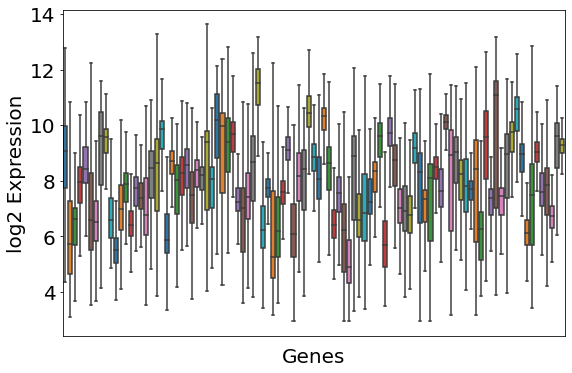

In [15]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=transpose_expression_qn.iloc[:, 1:100], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Genes', ylabel='log2 Expression')
matplotlib.pyplot.show()

# 3. select genes to be modified using expression

Expression is in gene ID form. All isoforms will be subject to expression constrains.

## 3.1. define genes in expression

In [16]:
expression_genes = transpose_expression_qn.columns.to_list()
print(len(expression_genes), expression_genes[:30])
type(expression_genes[3])

4998 [100, 1000, 10000, 10005, 10006, 10007, 10010, 10013, 10015, 10019, 10020, 10023, 10025, 10026, 10036, 10038, 10042, 10048, 10051, 10054, 10055, 10057, 10059, 10061, 10066, 10067, 10069, 10072, 10073, 10075]


int

## 3.2. define genes in model

In [17]:
%%time
model = cobra.io.load_matlab_model(model_file)

CPU times: user 2min 41s, sys: 480 ms, total: 2min 42s
Wall time: 2min 42s


In [18]:
constrained_model_genes = []

model_genes = [gene.id for gene in model.genes]

for gene in model_genes:
    if '.' in gene:
        geneID = int(gene.split('.')[0])
        if geneID in expression_genes: 
            constrained_model_genes.append(gene)

print(len(constrained_model_genes), constrained_model_genes[:30])
type(constrained_model_genes[3])

785 ['55293.1', '3939.1', '6566.1', '1738.1', '4967.2', '4967.1', '8050.1', '128.1', '2531.1', '8604.1', '10165.1', '51380.1', '2805.1', '2806.1', '4363.1', '2348.2', '2348.4', '2348.5', '2348.3', '2348.6', '2348.1', '4125.1', '38.1', '10449.1', '3030.1', '39.1', '9197.1', '55577.1', '5238.1', '9487.1']


str

# 4. define flux change rules

In [19]:
constrained_expression = pandas.DataFrame()
for gene in constrained_model_genes:
    expressionID = int(gene.split('.')[0])  
    constrained_expression[gene] = transpose_expression_qn[expressionID]

<ipython-input-19-e0942d8a939f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  constrained_expression[gene] = transpose_expression_qn[expressionID]


In [20]:
print(constrained_expression.shape)
constrained_expression.head()

(2636, 785)


,55293.1,3939.1,6566.1,1738.1,4967.2,4967.1,8050.1,128.1,2531.1,8604.1,...,1329.1,1350.1,9377.1,1351.1,1349.1,1337.1,1345.1,1327.1,1347.1,1340.1
GSM752709.cel,6.999762,12.417956,9.561724,9.833115,7.003610,7.003610,8.647482,8.288808,8.049484,5.884503,...,5.788716,8.800891,11.082898,10.708514,11.376915,11.729149,11.172317,4.393596,10.496271,10.927014
GSM752710.cel,6.952752,12.296618,9.540000,9.730350,6.953762,6.953762,8.376247,7.745550,7.515263,5.803338,...,5.913861,8.618271,11.072447,10.867704,11.344669,11.620026,11.172317,5.073545,10.292243,11.124328
GSM752711.cel,7.192446,12.312825,9.563356,9.936733,6.765164,6.765164,8.688974,8.080344,7.717758,5.688364,...,5.638377,8.697455,11.008407,10.693694,11.351088,11.729149,11.103441,4.891412,10.399299,10.905124
GSM752712.cel,7.135890,12.312825,9.466789,9.899421,6.920917,6.920917,8.614065,8.131974,7.796520,5.620700,...,5.757292,8.688974,10.985200,10.697297,11.295309,11.668275,11.238350,5.096870,10.414005,10.913858
GSM752713.cel,6.894831,12.219886,9.306048,9.769455,7.035465,7.035465,8.158776,7.589231,7.768052,6.843216,...,5.489385,8.534570,11.093225,10.830815,11.344669,11.729149,11.376915,5.037901,10.376047,11.113689


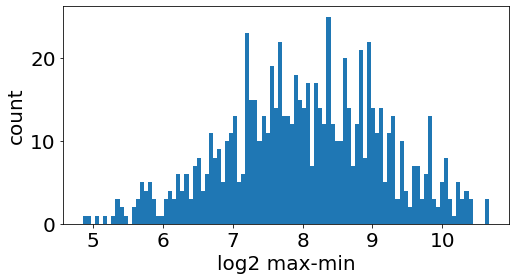

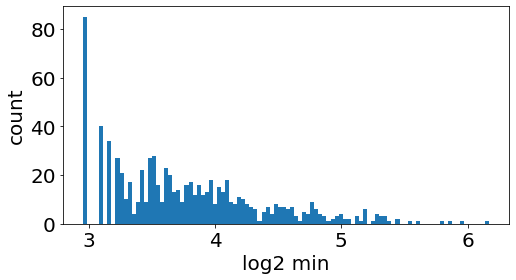

In [21]:
ranges = []; lbs = []
for element in constrained_expression.columns:
    a = numpy.min(constrained_expression[element])
    b = numpy.max(constrained_expression[element])
    ranges.append(b-a)
    lbs.append(a)

matplotlib.pyplot.hist(ranges, bins=100)
matplotlib.pyplot.xlabel('log2 max-min')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.show()

matplotlib.pyplot.hist(lbs, bins=100)
matplotlib.pyplot.xlabel('log2 min')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.show()

In [22]:
test = constrained_expression.iloc[:15, :]
test

,55293.1,3939.1,6566.1,1738.1,4967.2,4967.1,8050.1,128.1,2531.1,8604.1,...,1329.1,1350.1,9377.1,1351.1,1349.1,1337.1,1345.1,1327.1,1347.1,1340.1
GSM752709.cel,6.999762,12.417956,9.561724,9.833115,7.003610,7.003610,8.647482,8.288808,8.049484,5.884503,...,5.788716,8.800891,11.082898,10.708514,11.376915,11.729149,11.172317,4.393596,10.496271,10.927014
GSM752710.cel,6.952752,12.296618,9.540000,9.730350,6.953762,6.953762,8.376247,7.745550,7.515263,5.803338,...,5.913861,8.618271,11.072447,10.867704,11.344669,11.620026,11.172317,5.073545,10.292243,11.124328
GSM752711.cel,7.192446,12.312825,9.563356,9.936733,6.765164,6.765164,8.688974,8.080344,7.717758,5.688364,...,5.638377,8.697455,11.008407,10.693694,11.351088,11.729149,11.103441,4.891412,10.399299,10.905124
GSM752712.cel,7.135890,12.312825,9.466789,9.899421,6.920917,6.920917,8.614065,8.131974,7.796520,5.620700,...,5.757292,8.688974,10.985200,10.697297,11.295309,11.668275,11.238350,5.096870,10.414005,10.913858
GSM752713.cel,6.894831,12.219886,9.306048,9.769455,7.035465,7.035465,8.158776,7.589231,7.768052,6.843216,...,5.489385,8.534570,11.093225,10.830815,11.344669,11.729149,11.376915,5.037901,10.376047,11.113689
GSM752714.cel,6.913874,12.296618,9.269342,9.686106,6.877748,6.877748,8.208219,7.575360,7.650085,6.720515,...,6.073215,8.685754,11.155860,10.715827,11.313081,11.760662,11.363881,5.040330,10.305836,11.057350
GSM752715.cel,7.072687,12.234797,9.513671,9.702524,6.940768,6.940768,8.171418,7.500357,7.677877,6.355301,...,5.214936,8.411676,11.013079,10.867704,11.260837,11.770865,11.332057,4.977036,10.210811,10.989696
GSM752716.cel,7.069795,12.117161,9.263526,9.671799,7.074608,7.074608,8.148025,7.382496,7.630925,6.317603,...,5.491223,8.498731,11.072447,10.679212,11.313081,11.575300,11.363881,5.023438,10.257417,11.062382
GSM752717.cel,6.929846,12.399190,9.678871,9.717265,7.231744,7.231744,8.450455,7.790563,7.930602,6.460726,...,5.878238,8.679453,10.962545,10.822807,11.344669,11.770865,11.260837,5.533717,10.281417,11.052327
GSM752718.cel,6.606816,12.329309,9.629829,9.617705,7.233564,7.233564,8.155257,7.759456,7.900227,6.695804,...,6.167021,8.645341,11.013079,10.847261,11.266447,11.836998,11.249449,5.383539,10.341808,11.204816


In [23]:
test.rank(axis='index', pct=True)

,55293.1,3939.1,6566.1,1738.1,4967.2,4967.1,8050.1,128.1,2531.1,8604.1,...,1329.1,1350.1,9377.1,1351.1,1349.1,1337.1,1345.1,1327.1,1347.1,1340.1
GSM752709.cel,0.466667,1.000000,0.466667,0.866667,0.600000,0.600000,0.933333,1.000000,0.800000,0.266667,...,0.666667,0.933333,0.866667,0.333333,0.800000,0.400000,0.166667,0.066667,1.000000,0.466667
GSM752710.cel,0.400000,0.433333,0.400000,0.600000,0.533333,0.533333,0.600000,0.400000,0.066667,0.200000,...,0.866667,0.533333,0.733333,0.900000,0.600000,0.133333,0.166667,0.600000,0.500000,0.933333
GSM752711.cel,0.866667,0.566667,0.533333,1.000000,0.266667,0.266667,1.000000,0.733333,0.466667,0.133333,...,0.533333,0.866667,0.300000,0.133333,0.733333,0.400000,0.066667,0.133333,0.866667,0.333333
GSM752712.cel,0.800000,0.566667,0.266667,0.933333,0.400000,0.400000,0.866667,0.866667,0.600000,0.066667,...,0.600000,0.800000,0.200000,0.200000,0.266667,0.200000,0.333333,0.666667,0.933333,0.400000
GSM752713.cel,0.200000,0.166667,0.200000,0.666667,0.666667,0.666667,0.333333,0.266667,0.533333,1.000000,...,0.133333,0.266667,0.933333,0.733333,0.600000,0.400000,0.800000,0.333333,0.800000,0.866667
GSM752714.cel,0.266667,0.433333,0.133333,0.266667,0.333333,0.333333,0.466667,0.200000,0.333333,0.933333,...,0.933333,0.733333,1.000000,0.433333,0.366667,0.566667,0.700000,0.433333,0.600000,0.733333
GSM752715.cel,0.666667,0.300000,0.333333,0.366667,0.466667,0.466667,0.400000,0.133333,0.400000,0.533333,...,0.066667,0.133333,0.466667,0.900000,0.066667,0.700000,0.600000,0.200000,0.133333,0.533333
GSM752716.cel,0.600000,0.066667,0.066667,0.200000,0.733333,0.733333,0.200000,0.066667,0.200000,0.400000,...,0.200000,0.200000,0.733333,0.066667,0.366667,0.066667,0.700000,0.266667,0.333333,0.800000
GSM752717.cel,0.333333,0.933333,0.800000,0.533333,0.800000,0.800000,0.666667,0.533333,0.733333,0.733333,...,0.800000,0.666667,0.133333,0.666667,0.600000,0.700000,0.466667,1.000000,0.400000,0.666667
GSM752718.cel,0.066667,0.700000,0.666667,0.133333,0.866667,0.866667,0.266667,0.466667,0.666667,0.866667,...,1.000000,0.600000,0.466667,0.800000,0.166667,0.900000,0.400000,0.800000,0.666667,1.000000


In [24]:
test.rank(axis='index', pct=True)*2

,55293.1,3939.1,6566.1,1738.1,4967.2,4967.1,8050.1,128.1,2531.1,8604.1,...,1329.1,1350.1,9377.1,1351.1,1349.1,1337.1,1345.1,1327.1,1347.1,1340.1
GSM752709.cel,0.933333,2.000000,0.933333,1.733333,1.200000,1.200000,1.866667,2.000000,1.600000,0.533333,...,1.333333,1.866667,1.733333,0.666667,1.600000,0.800000,0.333333,0.133333,2.000000,0.933333
GSM752710.cel,0.800000,0.866667,0.800000,1.200000,1.066667,1.066667,1.200000,0.800000,0.133333,0.400000,...,1.733333,1.066667,1.466667,1.800000,1.200000,0.266667,0.333333,1.200000,1.000000,1.866667
GSM752711.cel,1.733333,1.133333,1.066667,2.000000,0.533333,0.533333,2.000000,1.466667,0.933333,0.266667,...,1.066667,1.733333,0.600000,0.266667,1.466667,0.800000,0.133333,0.266667,1.733333,0.666667
GSM752712.cel,1.600000,1.133333,0.533333,1.866667,0.800000,0.800000,1.733333,1.733333,1.200000,0.133333,...,1.200000,1.600000,0.400000,0.400000,0.533333,0.400000,0.666667,1.333333,1.866667,0.800000
GSM752713.cel,0.400000,0.333333,0.400000,1.333333,1.333333,1.333333,0.666667,0.533333,1.066667,2.000000,...,0.266667,0.533333,1.866667,1.466667,1.200000,0.800000,1.600000,0.666667,1.600000,1.733333
GSM752714.cel,0.533333,0.866667,0.266667,0.533333,0.666667,0.666667,0.933333,0.400000,0.666667,1.866667,...,1.866667,1.466667,2.000000,0.866667,0.733333,1.133333,1.400000,0.866667,1.200000,1.466667
GSM752715.cel,1.333333,0.600000,0.666667,0.733333,0.933333,0.933333,0.800000,0.266667,0.800000,1.066667,...,0.133333,0.266667,0.933333,1.800000,0.133333,1.400000,1.200000,0.400000,0.266667,1.066667
GSM752716.cel,1.200000,0.133333,0.133333,0.400000,1.466667,1.466667,0.400000,0.133333,0.400000,0.800000,...,0.400000,0.400000,1.466667,0.133333,0.733333,0.133333,1.400000,0.533333,0.666667,1.600000
GSM752717.cel,0.666667,1.866667,1.600000,1.066667,1.600000,1.600000,1.333333,1.066667,1.466667,1.466667,...,1.600000,1.333333,0.266667,1.333333,1.200000,1.400000,0.933333,2.000000,0.800000,1.333333
GSM752718.cel,0.133333,1.400000,1.333333,0.266667,1.733333,1.733333,0.533333,0.933333,1.333333,1.733333,...,2.000000,1.200000,0.933333,1.600000,0.333333,1.800000,0.800000,1.600000,1.333333,2.000000


In [25]:
(test.rank(axis='index', pct=True)*2).round(2)

,55293.1,3939.1,6566.1,1738.1,4967.2,4967.1,8050.1,128.1,2531.1,8604.1,...,1329.1,1350.1,9377.1,1351.1,1349.1,1337.1,1345.1,1327.1,1347.1,1340.1
GSM752709.cel,0.93,2.00,0.93,1.73,1.20,1.20,1.87,2.00,1.60,0.53,...,1.33,1.87,1.73,0.67,1.60,0.80,0.33,0.13,2.00,0.93
GSM752710.cel,0.80,0.87,0.80,1.20,1.07,1.07,1.20,0.80,0.13,0.40,...,1.73,1.07,1.47,1.80,1.20,0.27,0.33,1.20,1.00,1.87
GSM752711.cel,1.73,1.13,1.07,2.00,0.53,0.53,2.00,1.47,0.93,0.27,...,1.07,1.73,0.60,0.27,1.47,0.80,0.13,0.27,1.73,0.67
GSM752712.cel,1.60,1.13,0.53,1.87,0.80,0.80,1.73,1.73,1.20,0.13,...,1.20,1.60,0.40,0.40,0.53,0.40,0.67,1.33,1.87,0.80
GSM752713.cel,0.40,0.33,0.40,1.33,1.33,1.33,0.67,0.53,1.07,2.00,...,0.27,0.53,1.87,1.47,1.20,0.80,1.60,0.67,1.60,1.73
GSM752714.cel,0.53,0.87,0.27,0.53,0.67,0.67,0.93,0.40,0.67,1.87,...,1.87,1.47,2.00,0.87,0.73,1.13,1.40,0.87,1.20,1.47
GSM752715.cel,1.33,0.60,0.67,0.73,0.93,0.93,0.80,0.27,0.80,1.07,...,0.13,0.27,0.93,1.80,0.13,1.40,1.20,0.40,0.27,1.07
GSM752716.cel,1.20,0.13,0.13,0.40,1.47,1.47,0.40,0.13,0.40,0.80,...,0.40,0.40,1.47,0.13,0.73,0.13,1.40,0.53,0.67,1.60
GSM752717.cel,0.67,1.87,1.60,1.07,1.60,1.60,1.33,1.07,1.47,1.47,...,1.60,1.33,0.27,1.33,1.20,1.40,0.93,2.00,0.80,1.33
GSM752718.cel,0.13,1.40,1.33,0.27,1.73,1.73,0.53,0.93,1.33,1.73,...,2.00,1.20,0.93,1.60,0.33,1.80,0.80,1.60,1.33,2.00


In [26]:
flux_change = (constrained_expression.rank(axis='index', pct=True)*2).round(2)

In [27]:
flux_change

,55293.1,3939.1,6566.1,1738.1,4967.2,4967.1,8050.1,128.1,2531.1,8604.1,...,1329.1,1350.1,9377.1,1351.1,1349.1,1337.1,1345.1,1327.1,1347.1,1340.1
GSM752709.cel,1.27,1.66,1.75,1.78,1.02,1.02,1.81,1.51,1.43,0.32,...,0.25,0.85,1.36,0.56,1.80,1.51,0.69,0.00,0.78,1.45
GSM752710.cel,1.21,1.42,1.74,1.66,0.97,0.97,1.63,1.02,0.94,0.26,...,0.35,0.57,1.34,0.94,1.74,1.31,0.69,0.13,0.46,1.80
GSM752711.cel,1.50,1.46,1.75,1.85,0.82,0.82,1.83,1.38,1.12,0.20,...,0.14,0.70,1.20,0.52,1.75,1.51,0.60,0.05,0.63,1.40
GSM752712.cel,1.44,1.46,1.69,1.82,0.94,0.94,1.79,1.42,1.21,0.17,...,0.22,0.68,1.17,0.53,1.65,1.38,0.82,0.14,0.66,1.42
GSM752713.cel,1.15,1.27,1.56,1.71,1.05,1.05,1.33,0.80,1.18,1.29,...,0.06,0.47,1.39,0.86,1.74,1.51,1.19,0.11,0.59,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM46391.CEL,0.12,1.00,1.96,0.61,1.08,1.08,0.81,1.82,0.72,0.86,...,1.41,1.44,0.62,0.54,1.26,0.64,1.05,1.80,1.19,0.30
GSM46392.CEL,0.05,1.80,0.77,0.49,1.53,1.53,1.21,1.77,0.93,1.17,...,2.00,1.45,0.87,1.44,1.26,0.81,1.45,1.77,1.21,1.26
GSM46393.CEL,0.05,1.53,0.66,0.52,1.81,1.81,0.88,1.69,0.64,1.29,...,1.94,1.42,0.74,1.41,1.13,0.93,0.57,1.78,1.00,0.97
GSM46394.CEL,0.04,0.14,1.99,0.04,0.53,0.53,0.27,1.93,1.83,1.87,...,1.32,1.11,0.57,0.19,1.01,0.43,0.32,1.62,1.04,0.24


In [28]:
for element in list(numpy.sort(flux_change.iloc[:, 0])):
    print(element)

0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.07
0.07
0.07
0.07
0.07
0.07
0.07
0.07
0.07
0.07
0.07
0.07
0.07
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.09
0.09
0.09
0.09
0.09
0.09
0.09
0.09
0.09
0.09
0.09
0.09
0.09
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.12
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.14
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.16

(array([19., 27., 26., 26., 27., 26., 27., 25., 27., 27., 25., 28., 26.,
        25., 27., 27., 28., 24., 27., 26., 26., 26., 26., 28., 24., 28.,
        29., 25., 26., 26., 26., 26., 27., 27., 38., 14., 25., 28., 24.,
        29., 38., 14., 25., 27., 28., 24., 41., 13., 27., 24., 27., 27.,
        26., 27., 28., 26., 39., 13., 26., 27., 26., 26., 28., 25., 26.,
        26., 28., 24., 40., 27., 12., 27., 28., 26., 27., 26., 26., 25.,
        26., 28., 26., 40., 25., 14., 26., 27., 26., 27., 26., 26., 26.,
        27., 26., 41., 25., 13., 27., 27., 26., 33.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
        1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.

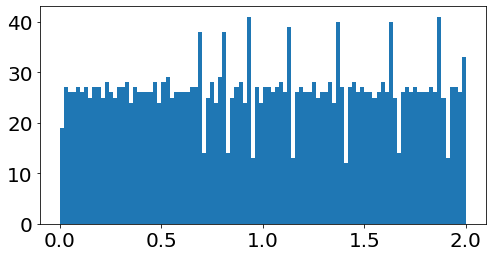

In [29]:
matplotlib.pyplot.hist(flux_change.iloc[:, 0], bins=100)

# 5. save results to file

In [30]:
flux_change.to_csv(flux_change_results_file)